In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Calculator for predictive values
Explanations for my dad, who is learning python. 
Calculating the positive predictive value of a covid-19 (or any other) test. 

### Part 1 - Calculate 'Positive predictive value' based on prevalence, sensitivity, specificity
Positive predictive value (PPV) = the probability that the disease is present when the test is positive

Enter prevalence, test specificity and test sensitivity in percent

In [23]:
# The user can enter the current disease prevalence, the test specificity and test sensitivity here. 
prevalence = 9.09 # in percent
specificity = 99 # in percent
sensitivity = 99.5 # in percent

In [24]:
# Dividing the numbers in percent by 100 to get probabilities
P = prevalence/100.
SP = specificity/100.
SE = sensitivity/100.

In [25]:
# Defining the function to calculate the PPV based on P, SP and SE
def get_ppv(p,se,sp):
    """ 
    Calculating PPV.
    Inputs: Prevalence, Sensitivity, Specificity. 
    Returns: The positive predictive value, which is the probability that the disease is present when the test is positive"""
    ppv = (se*p)/(se*p + (1-sp)*(1-p))
    return ppv

In [26]:
# Applying the function to calculate PPV based on the users entries above
result = get_ppv(P, SE, SP)
print(result)

0.9086666700155219


In [27]:
print('For a sensitivity of %.3f, specificity of %.3f, and prevalence of %.3f, your positive predictive value is %.3f.' %(SE, SP, P, result));

For a sensitivity of 0.995, specificity of 0.990, and prevalence of 0.091, your positive predictive value is 0.909.


### Part 2 - Plot PPV in dependency of prevalence
with different test **specificities** in colored lines

In [28]:
prevalences = np.arange(0.01,100,0.01)/100.
specificities = np.arange(90,100,1)/100.

In [29]:
r = np.zeros((len(prevalences), len(specificities)))

for i in range(len(specificities)):
    r[:,i] = get_ppv(prevalences, SE, specificities[i])


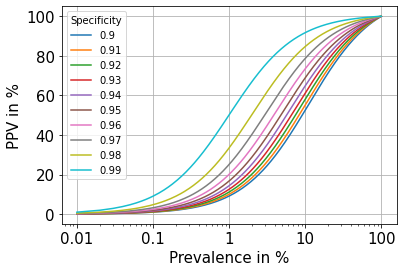

In [30]:
ax = plt.subplot()
plt.plot(prevalences*100,r*100)
ax.set_xscale('log')
plt.ylabel("PPV in %", fontsize = 15)
plt.xlabel("Prevalence in %", fontsize = 15)
plt.xticks([0.01,0.1,1,10,100], ['0.01','0.1','1','10','100'],fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(specificities, title = 'Specificity')
plt.grid()


### Part 3 - Plot PPV in dependency of prevalence
with different test **sensitivities** in colored lines

In [31]:
sensitivities = np.arange(70,100,2.5)/100.

In [32]:
rSE = np.zeros((len(prevalences), len(sensitivities)))
for i in range(len(sensitivities)):
    rSE[:,i] = get_ppv(prevalences, sensitivities[i], 0.99)

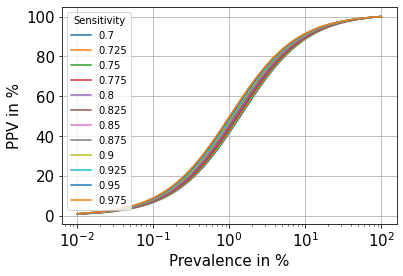

In [33]:
ax = plt.subplot()
plt.plot(prevalences*100,rSE*100)
ax.set_xscale('log')
plt.ylabel("PPV in %", fontsize = 15)
plt.xlabel("Prevalence in %", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(sensitivities, title = 'Sensitivity')
plt.grid()
